# P-Multigrid + Chebyshev Example

In [1]:
# dependencies
using LFAToolkit
using LinearAlgebra
using Pkg
Pkg.activate("./")
Pkg.instantiate()
using Plots

 Activating environment at `~/Dev/LFAToolkit.jl/papers/copper-mountain-2021/jupyter/Project.toml`


## Two-Grid Smoothing Factor

### P = 4 -> P = 2, v = 1

In [2]:
# setup
finep = 5
coarsep = 3
numbercomponents = 1
dimension = 1
mesh = Mesh1D(1.0)

ctofbasis = TensorH1LagrangePProlongationBasis(coarsep, finep, numbercomponents, dimension)

# diffusion operators
finediffusion = GalleryOperator("diffusion", finep, finep, mesh)
coarsediffusion = GalleryOperator("diffusion", coarsep, finep, mesh)

# Chebyshev smoother
chebyshev = Chebyshev(finediffusion)

# p-multigrid preconditioner
multigrid = PMultigrid(finediffusion, coarsediffusion, chebyshev, [ctofbasis])

p-multigrid preconditioner

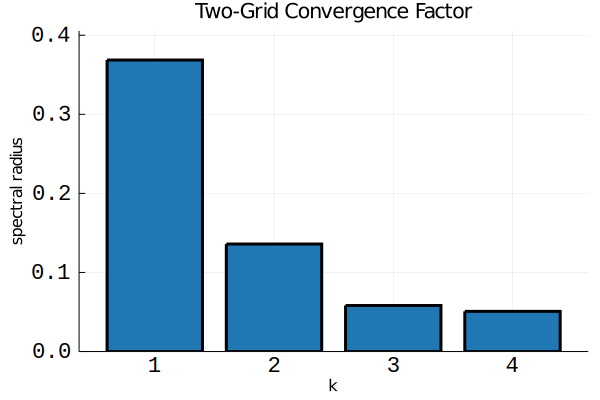

In [3]:
# full operator symbols
numbersteps = 250
maxeigenvalue = 0
θ_min = -π/2
θ_max = 3π/2
θ_step = 2π/(numbersteps-1)
θ_range = θ_min:θ_step:θ_max

# compute and plot smoothing factor
# setup
eigenvalues = zeros(4)

# compute
xrange = [1, 2, 3, 4]
for i in 1:numbersteps, j in xrange
    θ = [θ_range[i]]
    ω = [j]
    if abs(θ[1]) >  π/128
        A = computesymbols(multigrid, ω, [1, 1], θ)
        currenteigenvalues = [abs(val) for val in eigvals(A)]
        eigenvalues[j] = max(eigenvalues[j], currenteigenvalues...)
    end
end

# plot
bar(
    xrange,
    xlabel="k",
    xtickfont=font(12, "Courier"),
    eigenvalues,
    ytickfont=font(12, "Courier"),
    ylabel="spectral radius",
    linewidth=3,
    legend=:none,
    title="Two-Grid Convergence Factor",
    palette=palette(:tab10)
)
ylims!(min(0.0, eigenvalues...) * 1.1, max(eigenvalues...) * 1.1)

In [4]:
savefig("two_grid_converge_5_to_3_chebyshev")

### P = 4 -> P = 1, v = 1

In [5]:
# setup
finep = 5
coarsep = 2
numbercomponents = 1
dimension = 1
mesh = Mesh1D(1.0)

ctofbasis = TensorH1LagrangePProlongationBasis(coarsep, finep, numbercomponents, dimension)

# diffusion operators
finediffusion = GalleryOperator("diffusion", finep, finep, mesh)
coarsediffusion = GalleryOperator("diffusion", coarsep, finep, mesh)

# Chebyshev smoother
chebyshev = Chebyshev(finediffusion)

# p-multigrid preconditioner
multigrid = PMultigrid(finediffusion, coarsediffusion, chebyshev, [ctofbasis])

p-multigrid preconditioner

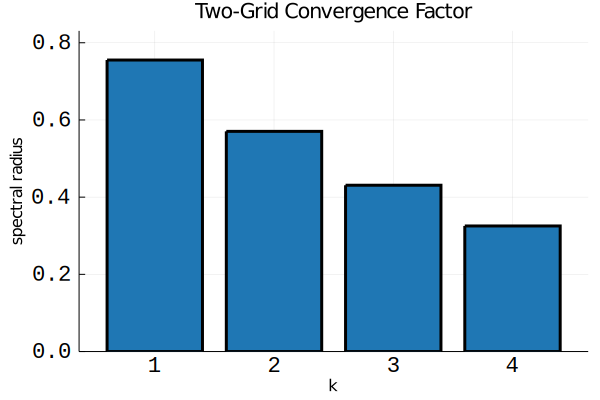

In [6]:
# full operator symbols
numbersteps = 250
maxeigenvalue = 0
θ_min = -π/2
θ_max = 3π/2
θ_step = 2π/(numbersteps-1)
θ_range = θ_min:θ_step:θ_max

# compute and plot smoothing factor
# setup
eigenvalues = zeros(4)

# compute
xrange = [1, 2, 3, 4]
for i in 1:numbersteps, j in xrange
    θ = [θ_range[i]]
    ω = [j]
    if abs(θ[1]) >  π/128
        A = computesymbols(multigrid, ω, [1, 1], θ)
        currenteigenvalues = [abs(val) for val in eigvals(A)]
        eigenvalues[j] = max(eigenvalues[j], currenteigenvalues...)
    end
end

# plot
bar(
    xrange,
    xlabel="k",
    xtickfont=font(12, "Courier"),
    eigenvalues,
    ytickfont=font(12, "Courier"),
    ylabel="spectral radius",
    linewidth=3,
    legend=:none,
    title="Two-Grid Convergence Factor",
    palette=palette(:tab10)
)
ylims!(min(0.0, eigenvalues...) * 1.1, max(eigenvalues...) * 1.1)

In [7]:
savefig("two_grid_converge_5_to_2_chebyshev")